In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline
plt.style.use('default')
line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './'

In [2]:
def overall_accuracy(result_dict, classes=1000):
    
    name_dict = {'er':'Ours', 'icarl':'iCaRL', }
    
    fontsize=10
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,4,1)
    for idx, key in enumerate(result_dict.keys()):
        result = result_dict[key]
        tasknum = len(result['all'][0][0][1][0])
        step_size = classes // tasknum
        class_array = range(step_size,classes+1,step_size)
        top_1 = result['all'][0][0][0][0]
        top_1_cheat = result['cheat'][0][0][0][0]
        
        top_1_avg = sum(top_1) / tasknum
    
        plt.plot(class_array, top_1, linestyle='-', label=key+' top-1 normal (%.1f)'%(top_1_avg),marker = line_markers[0], linewidth=3, markersize=10)
#         plt.plot(class_array, top_1_cheat, linestyle='-', label='top-1 cheat (%.1f)'%(top_1_cheat[tasknum-1]),marker = line_markers[0], linewidth=3, markersize=10)
        
    plt.ylim(0,100)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('classes', fontsize=20)
#     plt.title('Top-1 Accuracy (Avg: %.1f)'%(sum(top_1[1:]/(tasknum-1))))
    plt.title('Top-1 Accuracy')
    plt.legend(loc='upper right', fontsize=fontsize)
    
    plt.subplot(1,4,2)
    for idx, key in enumerate(result_dict.keys()):
        result = result_dict[key]
        tasknum = len(result['all'][0][0][1][0])
        step_size = classes // tasknum
        class_array = range(step_size,classes+1,step_size)
        top_5 = result['all'][0][0][1][0]
        top_5_cheat = result['cheat'][0][0][1][0]
        
        top_5_avg = sum(top_5) / tasknum
        
        plt.plot(class_array, top_5, linestyle='-', label=key+' top-5 normal (%.1f)'%(top_5_avg),marker = line_markers[0], linewidth=3, markersize=10)
#         plt.plot(class_array, top_5_cheat, linestyle='-', label='top-5 cheat (%.1f)'%(top_5_cheat[tasknum-1]),marker = line_markers[0], linewidth=3, markersize=10)
    
    plt.ylim(0,100)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('classes', fontsize=20)
#     plt.title('Top-5 Accuracy (Avg: %.1f)'%(sum(top_5[1:]/(tasknum-1))))
    plt.title('Top-5 Accuracy')
    plt.legend(loc='lower left', fontsize=fontsize)
    
    plt.subplot(1,4,3)
    for idx, key in enumerate(result_dict.keys()):
        result = result_dict[key]
        tasknum = len(result['all'][0][0][1][0])
        step_size = classes // tasknum
        class_array = range(step_size,classes+1,step_size)
        task_1 = result['task_soft_1']
        task_5 = result['task_soft_5']
        
        task_1_avg = [0] * tasknum
        task_5_avg = [0] * tasknum
        stat_ratio = [0] * (tasknum-1)

        for i in range(tasknum):
            task_1_avg[i] = sum(task_1[i]) / (i+1)
            task_5_avg[i] = sum(task_5[i]) / (i+1)
    
        plt.plot(class_array, task_1_avg, linestyle='-', label=key+' top-1 avg (%.1f)'%(task_1_avg[tasknum-1]),marker = line_markers[0], linewidth=3, markersize=10)
#         plt.plot(class_array, task_5_avg, linestyle='-', label='top-5 avg (%.1f)'%(task_5_avg[tasknum-1]),marker = line_markers[0], linewidth=3, markersize=10)
    
    plt.ylim(0,100)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('classes', fontsize=20)
    plt.title('Average Task Accuracy')
    plt.legend(loc='lower left', fontsize=fontsize)
    
    plt.subplot(1,4,4)
    for idx, key in enumerate(result_dict.keys()):
        result = result_dict[key]
        tasknum = len(result['all'][0][0][1][0])
        step_size = classes // tasknum
        class_array = range(step_size,classes+1,step_size)
        stat = result['all'][0][0][2]
        stat_ratio = [0] * (tasknum-1)
        
        for i in range(tasknum-1):
#             stat_ratio[i] = (stat[i][2]) / stat[i][6] * 100
            prev = stat[i][2] / (stat[i][0]+stat[i][1]+stat[i][2])
            new = stat[i][5] / (stat[i][3]+stat[i][4]+stat[i][5])
            stat_ratio[i] = (prev+new)/2 * 100
        avg_stat_ratio = sum(stat_ratio) / len(stat_ratio)
        
        plt.plot(class_array[1:], stat_ratio, linestyle='-', label=key + '(%.1f)'%avg_stat_ratio, marker = line_markers[0], linewidth=3, markersize=10)
    
    plt.ylim(0,100)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('classes', fontsize=20)
#     plt.title('Bias ratio')
    plt.title('Balance ratio')
    plt.legend(loc='upper left', fontsize=fontsize)


In [3]:
def Histogram(strength, plot_num = 50):
    
    plot_idx = shuffle(np.arange(100), random_state=0)[:plot_num]
    sampled_strength = strength[plot_idx]
    sampled_strength_sorted = np.sort(sampled_strength, axis=0)
    
    plt.figure(figsize = (10,8))
    for i in range(plot_num):
        plt.plot(np.arange(9)+1,np.log(sampled_strength_sorted[i]))
    
    plt.xlabel('State', fontsize=30)
    plt.xticks([1,2,3,4,5,6,7,8,9], fontsize=30)
#     plt.ylim(0,100)

In [4]:
plt.figure(figsize = (0.1,0.1))
plt.style.use('default')
plt.plot(range(5),range(5))
plt.xticks(visible=False)
plt.yticks(visible=False)

(array([-2.5,  0. ,  2.5,  5. ]), <a list of 4 Text yticklabel objects>)

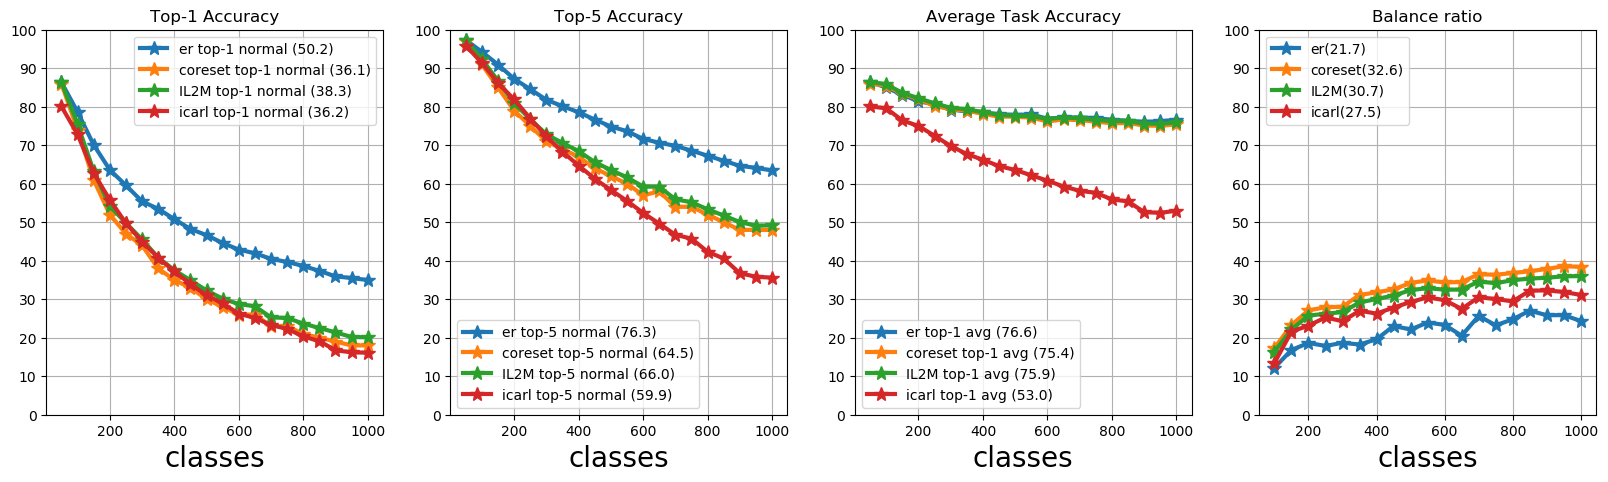

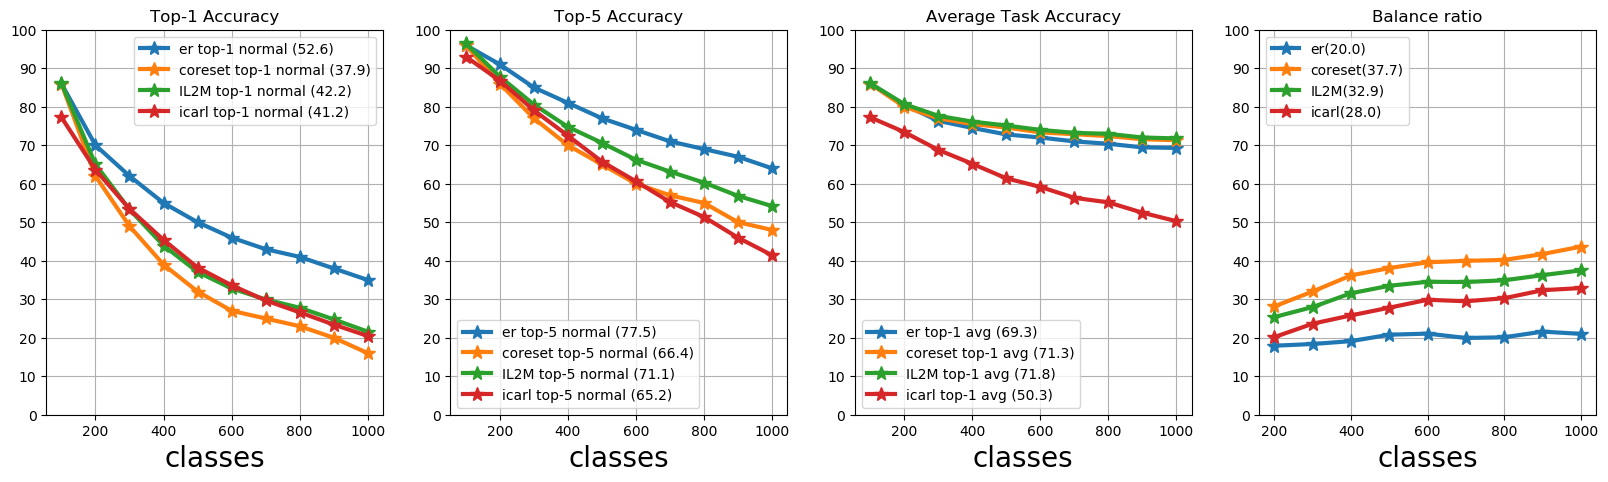

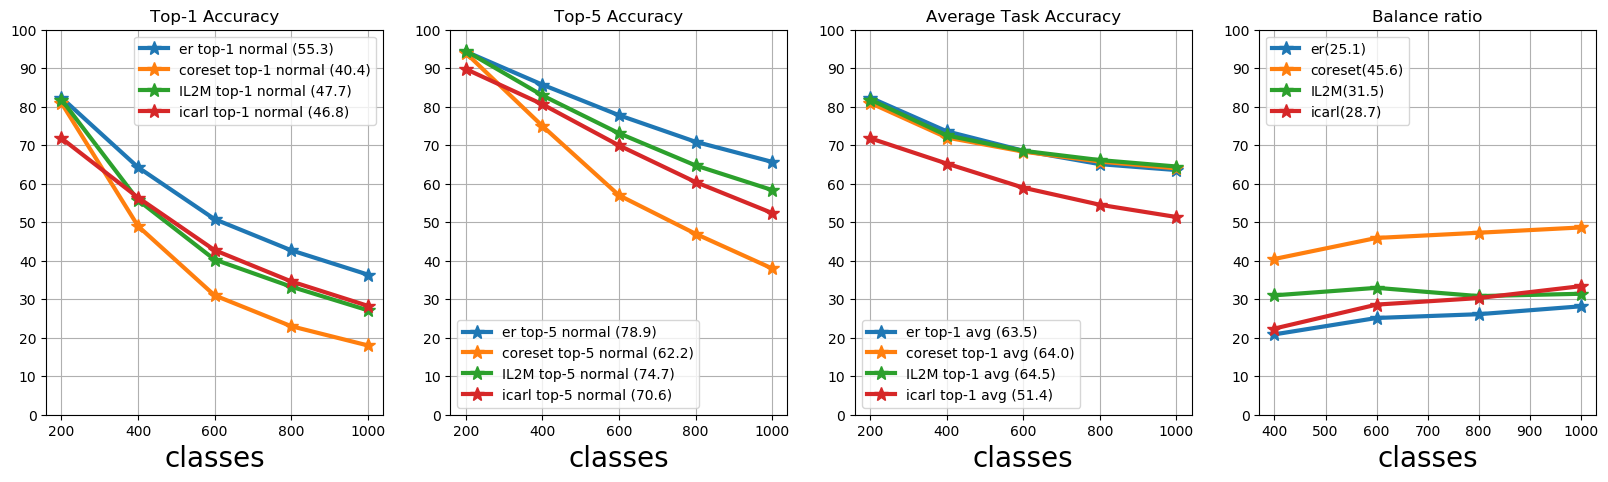

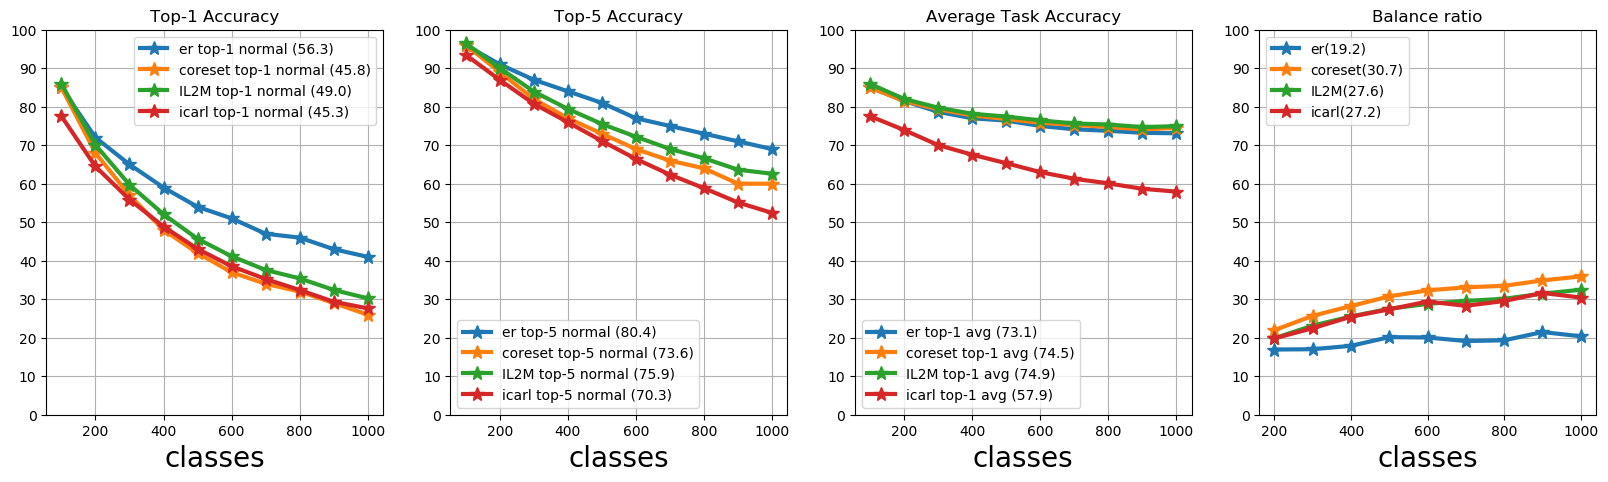

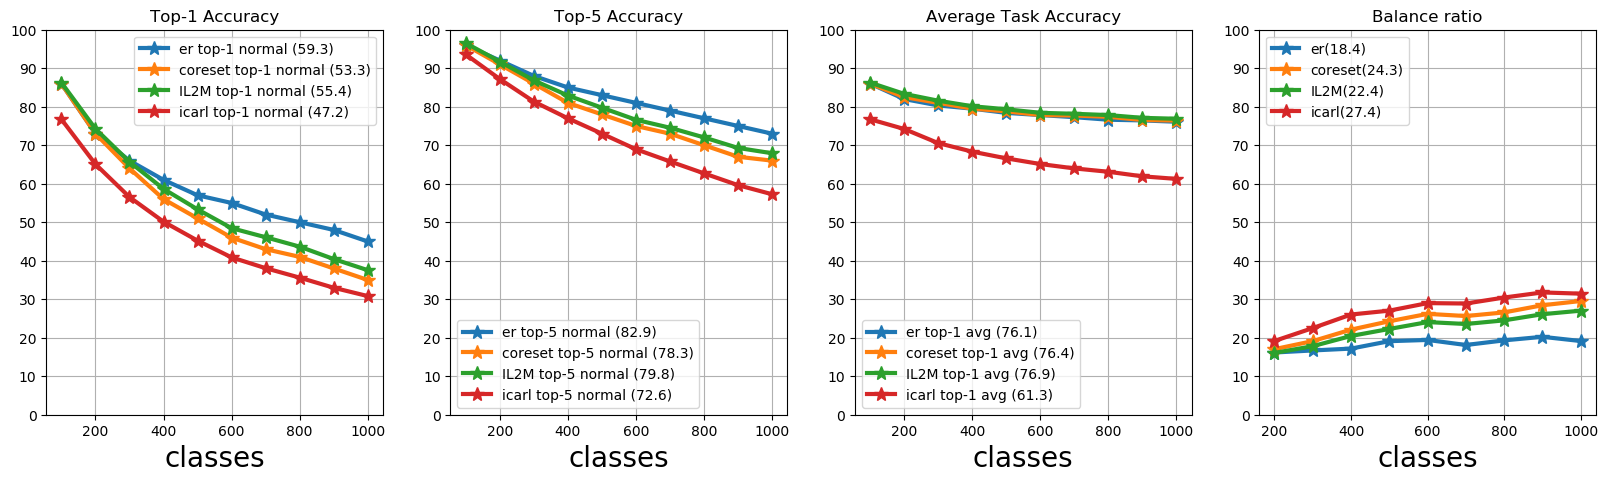

In [5]:
# trainer_arr = ['er','coreset', 'IL2M', 'icarl', 'er_NMC', 'coreset_NMC']
trainer_arr = ['er','coreset', 'IL2M', 'icarl']
mem_step_arr = [(5000,50),(5000,100),(5000,200),(10000,100),(20000,100)]

result_dict = {}
for mem_step in mem_step_arr:
    result_dict[mem_step] = {}
    m, step_size = mem_step
    for trainer in trainer_arr:
        factor = 4
        if 'er' in trainer:
            factor = 5
        if 'icarl' in trainer:
            factor = 1
            
        if 'icarl' in trainer:
            name = 'RESULT_Imagenet_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_32_batch_128_epoch_60_factor_{}_RingBuffer_CE.mat'
        elif mem_step == (5000,200) and trainer == 'er':
            name = 'RESULT_Imagenet_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_64_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
        elif mem_step == (5000,50) and trainer == 'er':
            name = 'RESULT_Imagenet_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_16_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
        else:
            name = 'RESULT_Imagenet_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_32_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
            
        result_dict[mem_step][trainer] = sio.loadmat(root+name.format(trainer, m, step_size, factor))

    overall_accuracy(result_dict[mem_step])


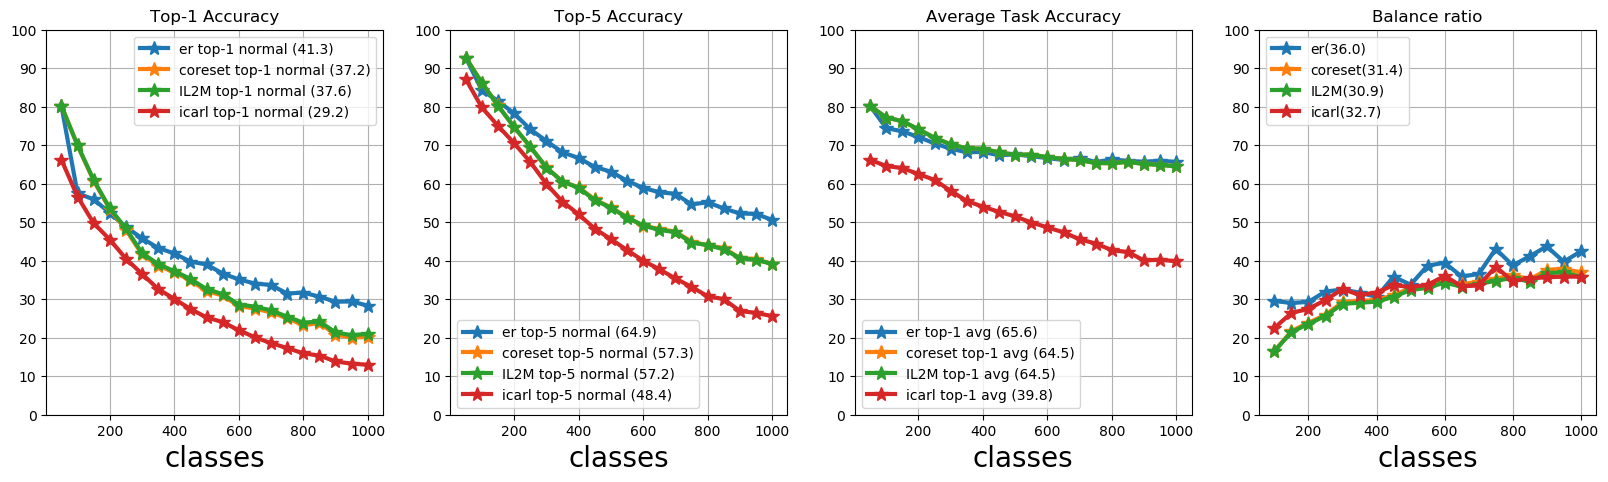

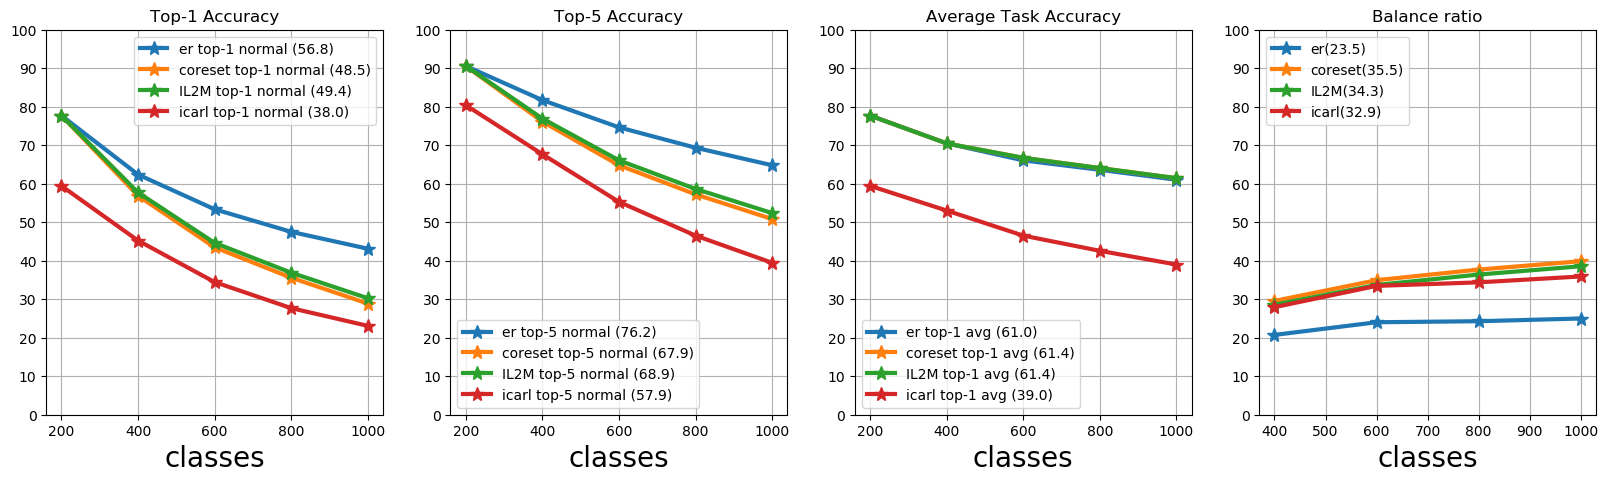

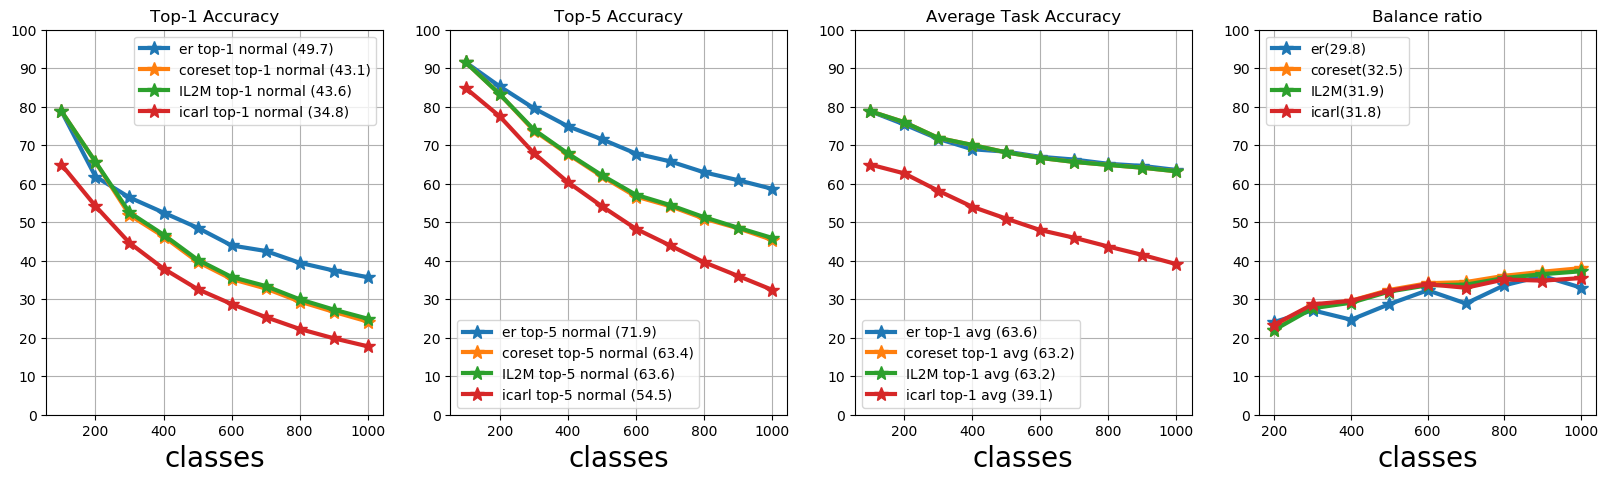

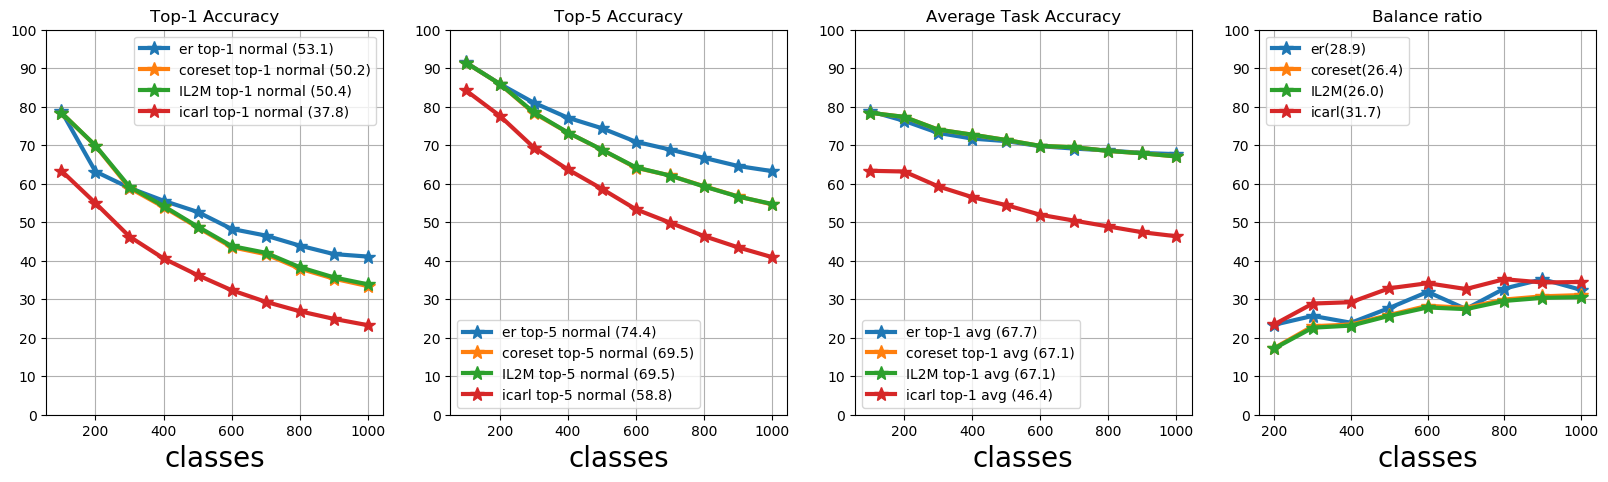

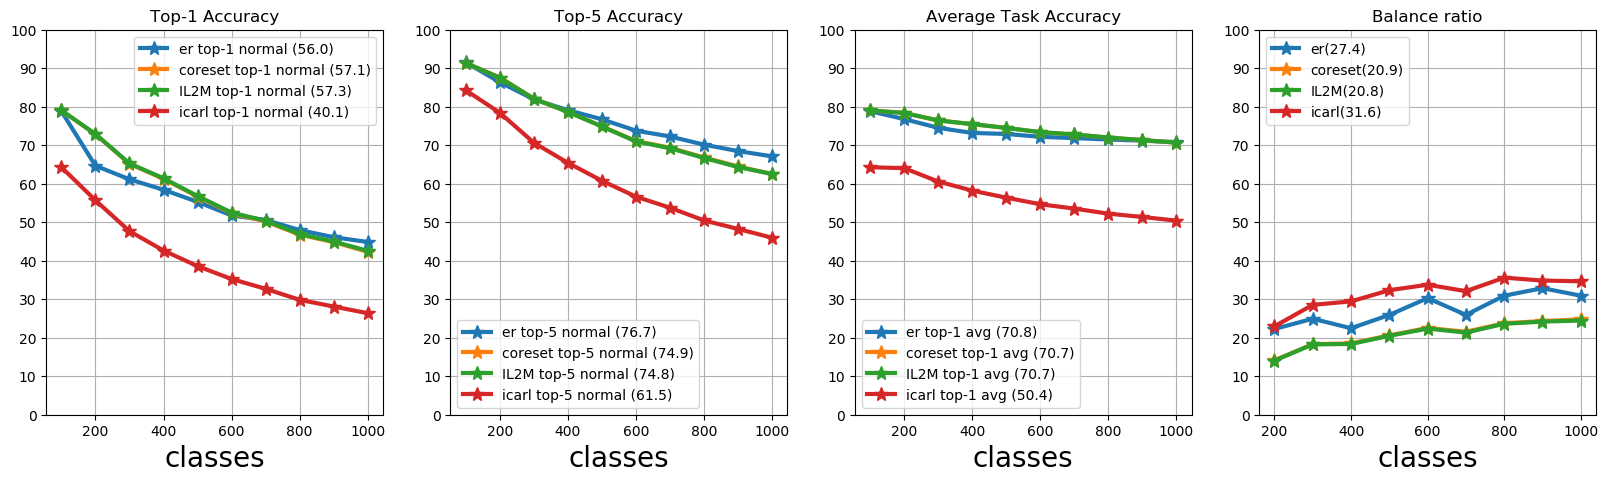

In [6]:
trainer_arr = ['er','coreset','IL2M','icarl']
mem_step_arr = [(5000,50),(5000,200),(5000,100),(10000,100),(20000,100)]
result_dict = {}
for mem_step in mem_step_arr:
    result_dict[mem_step] = {}
    m, step_size = mem_step
    for trainer in trainer_arr:
        replay = 32
        if step_size == 50 and trainer == 'er':
            replay = 16
        elif step_size == 200 and trainer == 'er':
            replay = 64
        factor = 4
        if 'er' in trainer:
            factor = 5
        if 'icarl' in trainer:
            factor = 1
        
        if 'icarl' in trainer:
            name = 'RESULT_Google_Landmark_v2_1K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_60_factor_{}_RingBuffer_CE.mat'
        elif trainer == 'coreset' or trainer == 'IL2M':
            name = 'RESULT_Google_Landmark_v2_1K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
        else:
            name = 'RESULT_Google_Landmark_v2_1K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
            
        result_dict[mem_step][trainer] = sio.loadmat(root+name.format(trainer, m, step_size, replay, factor))

    overall_accuracy(result_dict[mem_step])



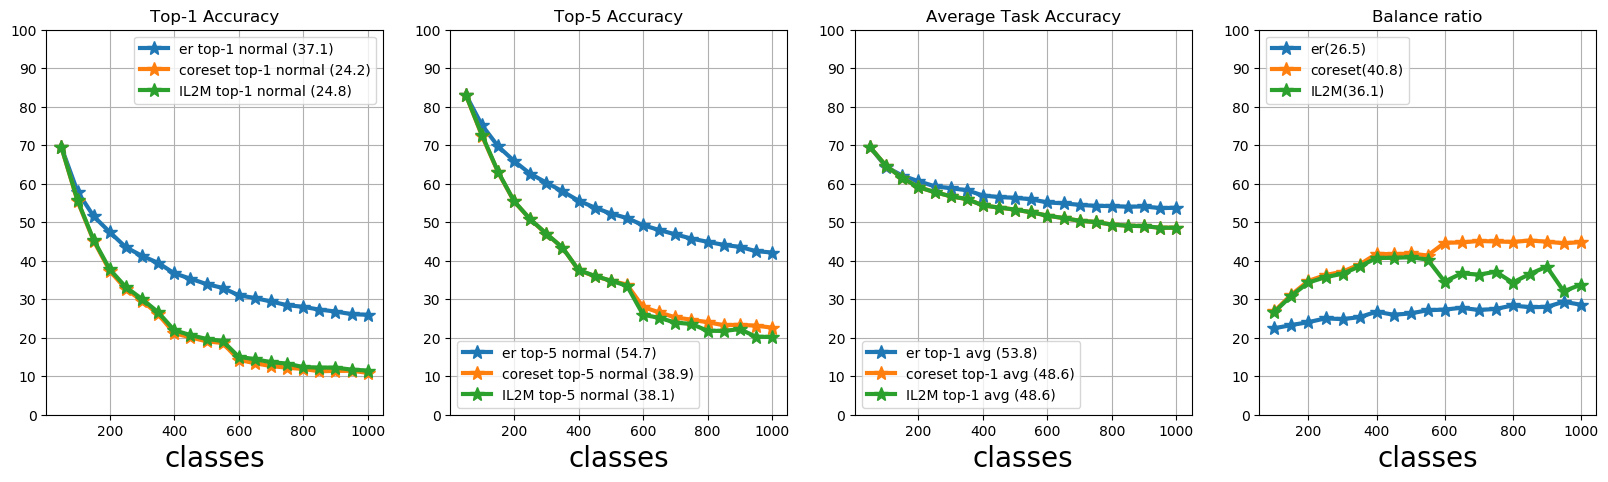

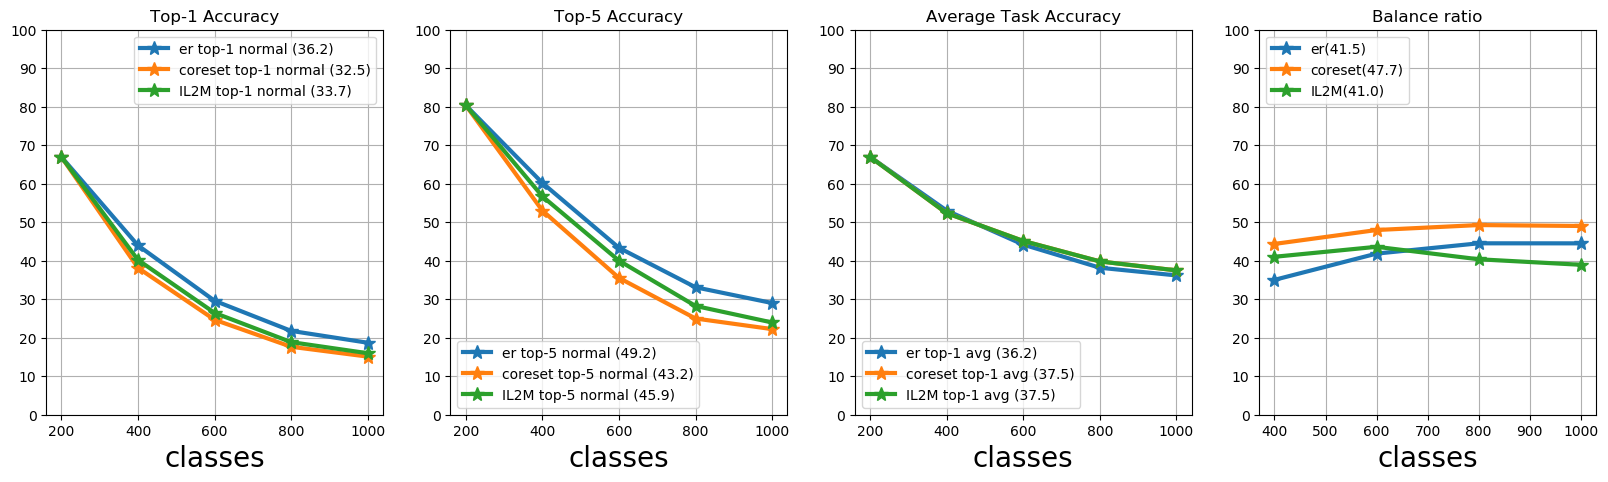

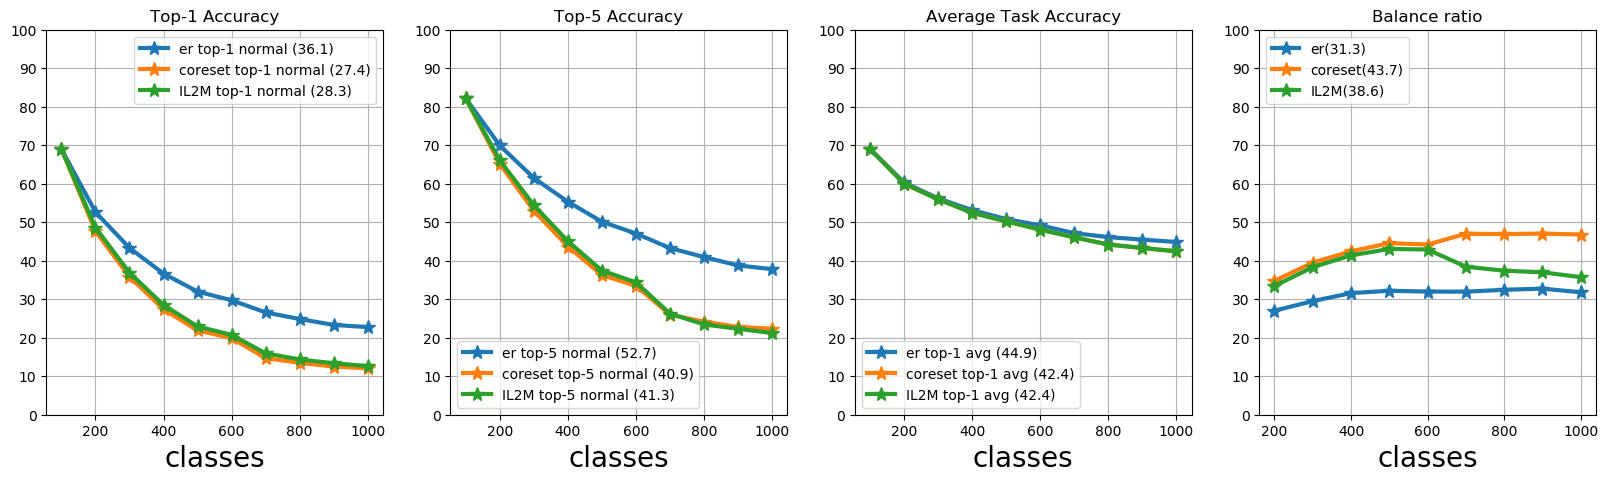

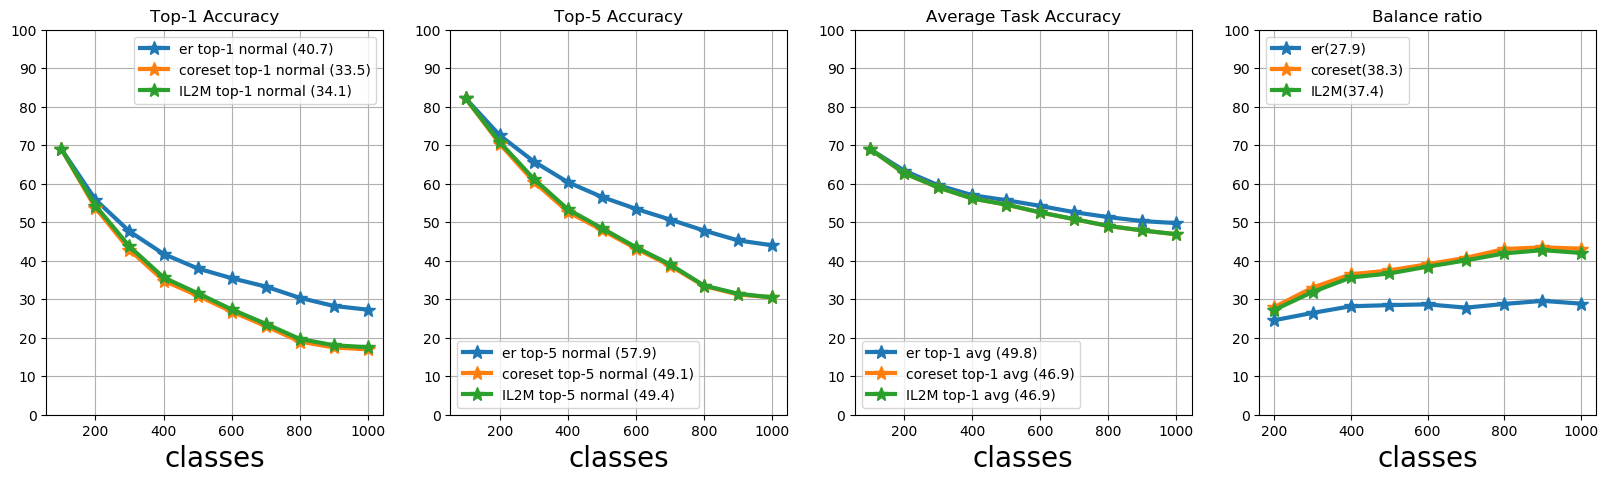

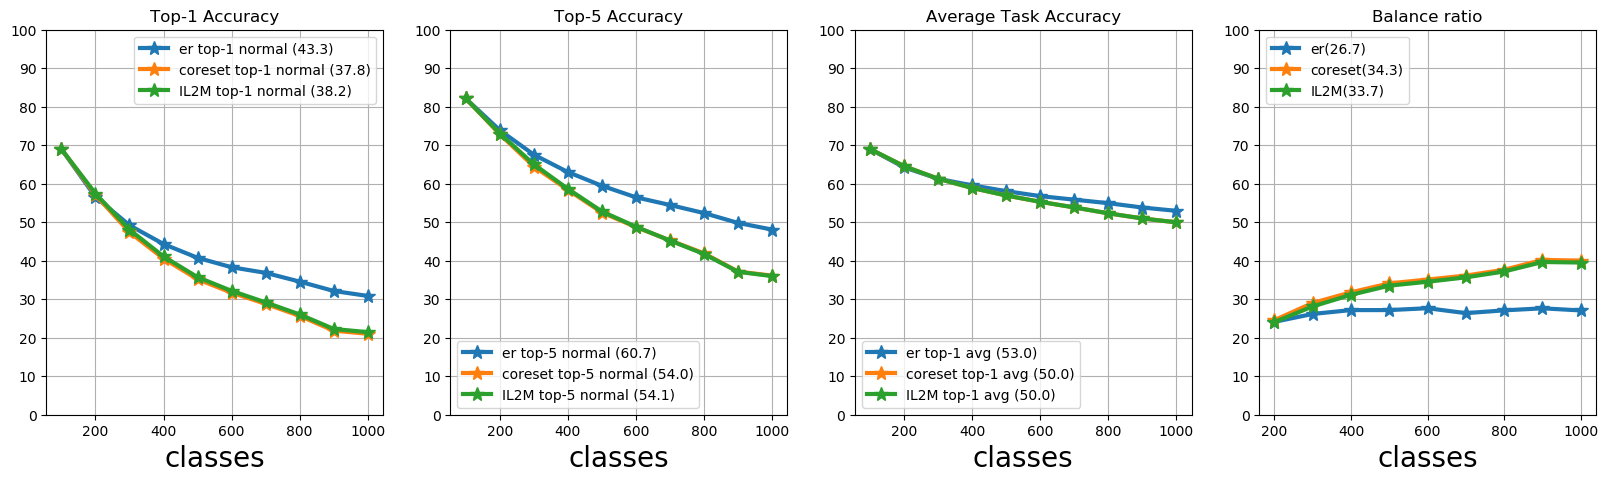

In [7]:
trainer_arr = ['er','coreset', 'IL2M']
mem_step_arr = [(10000,500),(10000,2000),(10000,1000),(20000,1000),(30000,1000)]
result_dict = {}
for mem_step in mem_step_arr:
    result_dict[mem_step] = {}
    m, step_size = mem_step
    for trainer in trainer_arr:
        replay = 32
        if step_size == 500 and trainer == 'er':
            replay = 16
        elif step_size == 2000 and trainer == 'er':
            replay = 64
        factor = 4
        if 'er' in trainer:
            factor = 5
        if 'icarl' in trainer:
            factor = 1
        
        if 'icarl' in trainer:
            name = 'RESULT_Google_Landmark_v2_10K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_60_factor_{}_RingBuffer_CE.mat'
        elif trainer == 'coreset' or trainer == 'IL2M':
            name = 'RESULT_Google_Landmark_v2_10K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
        else:
            name = 'RESULT_Google_Landmark_v2_10K_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_100_factor_{}_RingBuffer_CE_lr_change.mat'
            
        result_dict[mem_step][trainer] = sio.loadmat(root+name.format(trainer, m, step_size, replay, factor))

    overall_accuracy(result_dict[mem_step])




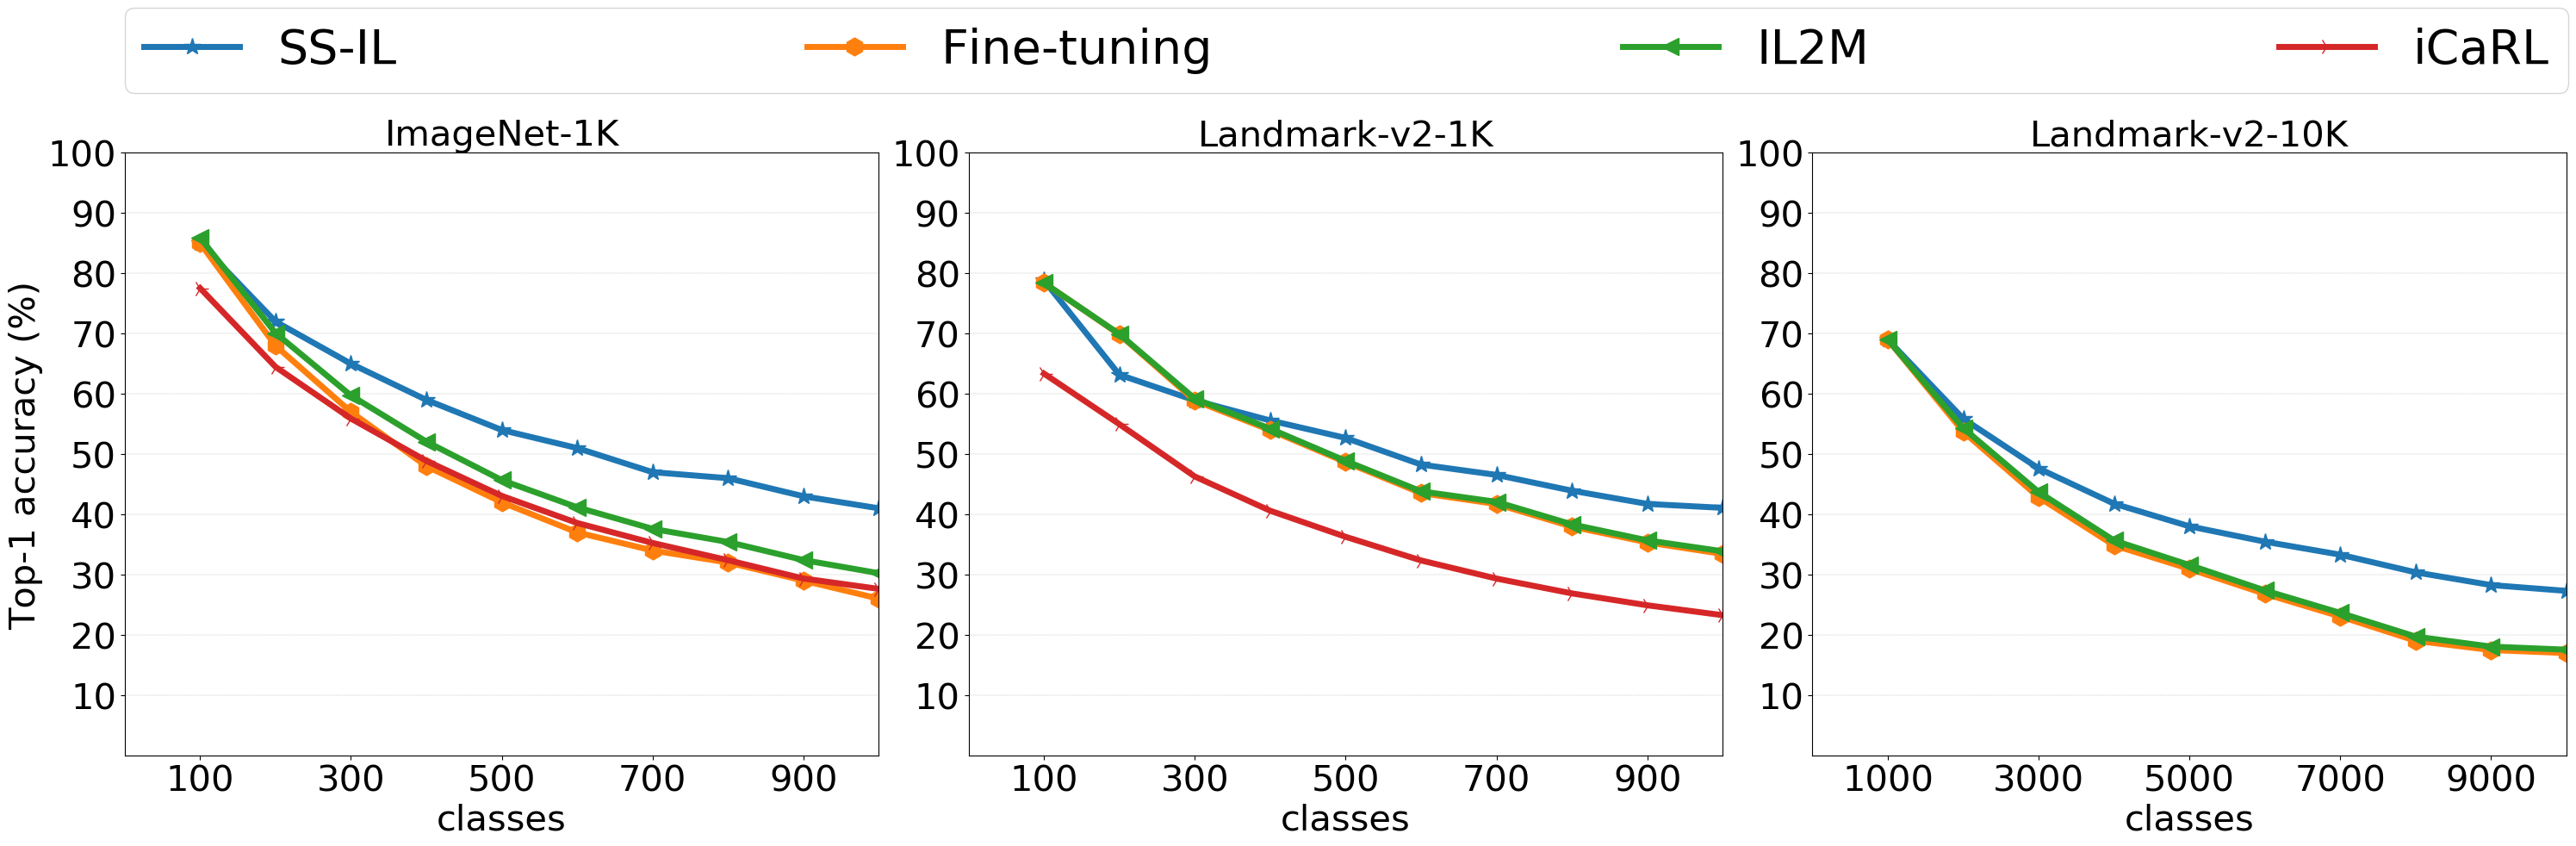

In [8]:
results_dict = {}
for dataset in ['Imagenet', 'Google_Landmark_v2_1K','Google_Landmark_v2_10K']:
    results_dict[dataset] = {}
    for trainer in ['icarl', 'er', 'coreset', 'IL2M']:
        if (trainer == 'icarl') and dataset == 'Google_Landmark_v2_10K':
            continue
        base = 100
        m = 10000
        if dataset == 'Google_Landmark_v2_10K':
            base = 1000
            m=20000
        if 'icarl' in trainer:
            name = 'RESULT_{}_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_32_batch_128_epoch_60_factor_1_RingBuffer_CE.mat'
        elif trainer == 'coreset' or trainer == 'IL2M':
            name = 'RESULT_{}_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat'
        else:
            name = 'RESULT_{}_{}_0_memsz_{}_alpha_1_beta_0.0001_base_{}_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat'
        results_dict[dataset][trainer] = sio.loadmat(root+name.format(dataset, trainer, m, base))
        
title_arr = ['ImageNet-1K', 'Landmark-v2-1K', 'Landmark-v2-10K']
plt.figure(figsize = (30,10))    
name_dict = {'coreset':'Fine-tuning', 'er':'SS-IL', 'IL2M':'IL2M', 'icarl':'iCaRL'}
markersize=15
linewidth=5

for idx, dataset in enumerate(['Imagenet', 'Google_Landmark_v2_1K', 'Google_Landmark_v2_10K']):
    plt.subplot(1,3,idx+1)
    for i, trainer in enumerate(['er', 'coreset', 'IL2M', 'icarl']):
        if (trainer == 'icarl') and dataset == 'Google_Landmark_v2_10K':
            continue
        result = results_dict[dataset][trainer]
        class_array = [100,200,300,400,500,600,700,800,900,1000]
        if dataset == 'Google_Landmark_v2_10K':
            class_array = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

        top_1 = result['all'][0][0][0][0]

        plt.plot(class_array, top_1, linestyle='-', label=name_dict[trainer], marker = line_markers[i], linewidth=linewidth, markersize=markersize)

    if idx < 2:
        plt.ylim(0,100)
        plt.xlim(0,1000)
        plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
        plt.xticks([100,300,500,700,900],fontsize = 30)
    else:
        plt.ylim(0,100)
        plt.xlim(0,10000)
        plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
        plt.xticks([1000,3000,5000,7000,9000],fontsize = 30)
        plt.xticks(fontsize = 30)


    plt.grid(linewidth=0.3, linestyle='--', axis='y')
    plt.xlabel('classes', fontsize=30)
    plt.title(title_arr[idx],fontsize = 30)
    if idx==0:
        plt.ylabel('Top-1 accuracy (%)', fontsize=30)
        plt.legend(bbox_to_anchor=(0, 1.1, 3.24,.102), loc=3, ncol=4, mode='expand', borderaxespad=0., frameon = True, fontsize = 40)

plt.tight_layout()
plt.savefig('figures/Top-1.pdf', bbox_inches='tight')

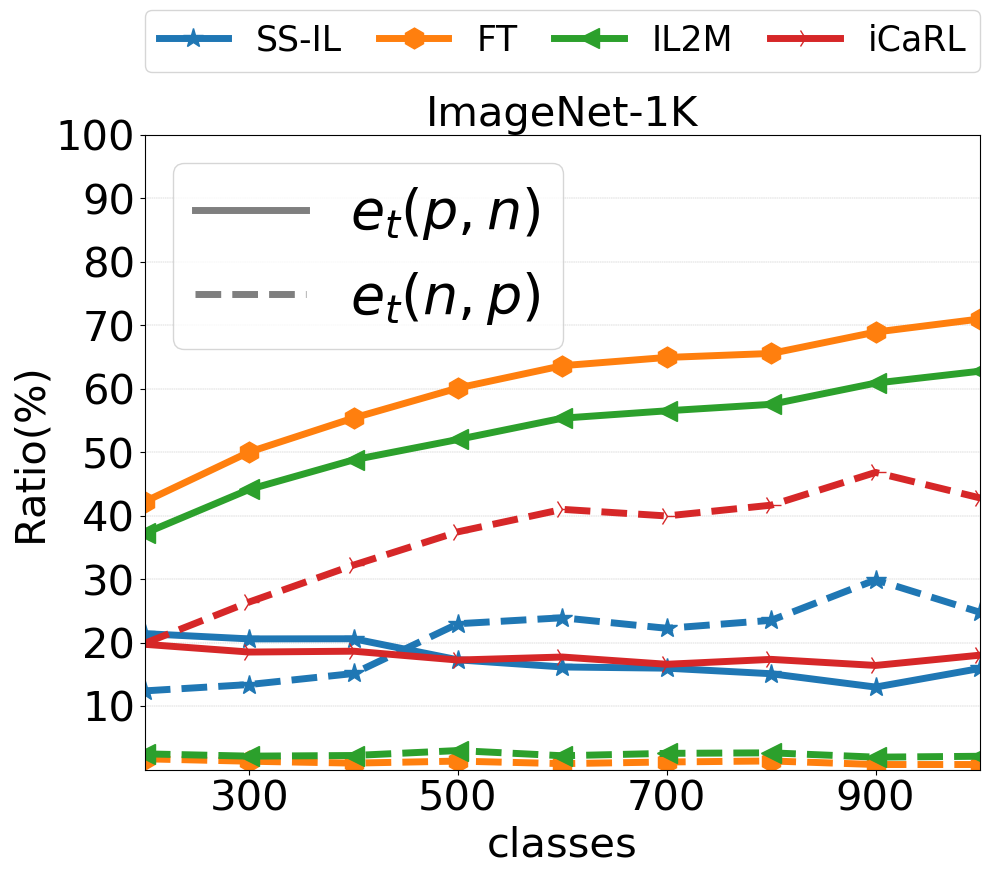

In [30]:
# plt.figure(figsize = (30,8))
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
    
name_dict = {'coreset':'FT', 'er':'SS-IL', 'IL2M':'IL2M', 'icarl':'iCaRL'}
color_arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
title_arr = ['ImageNet-1K', 'Landmark-1K', 'Landmark-10K']
markersize=15
linewidth=5

# for idx, dataset in enumerate(['Imagenet', 'Google_Landmark_v2_1K', 'Google_Landmark_v2_10K']):
for idx, dataset in enumerate(['Imagenet']):
#     plt.subplot(1,3,idx+1)
    for i, trainer in enumerate(['er', 'coreset', 'IL2M', 'icarl']):
        if (trainer == 'icarl' or trainer == 'er') and dataset == 'Google_Landmark_v2_10K':
            continue
        result = results_dict[dataset][trainer]
        class_array = [200,300,400,500,600,700,800,900,1000]
        if dataset == 'Google_Landmark_v2_10K':
            class_array = [2000,3000,4000,5000,6000,7000,8000,9000,10000]

        stat = result['all'][0][0][2]
        stat_ratio = [0] * 9
        old_ratio = [0] * 9
        new_ratio = [0] * 9
        for j in range(9):
            old_ratio[j] = stat[j][2] / (stat[j][0]+stat[j][1]+stat[j][2]) * 100
            new_ratio[j] = stat[j][5] / (stat[j][3]+stat[j][4]+stat[j][5]) * 100

        ax.plot(class_array, old_ratio, linestyle='-', label=name_dict[trainer], marker = line_markers[i], linewidth=linewidth, markersize=markersize, color = color_arr[i])
        ax.plot(class_array, new_ratio, linestyle='--', marker = line_markers[i], linewidth=linewidth, markersize=markersize, color = color_arr[i])
        
        if idx == 0:
            e_p_n, = ax.plot(class_array, np.zeros(9)-1, linestyle='-', linewidth=linewidth, color = '#7f7f7f')
            e_n_p, = ax.plot(class_array, np.zeros(9)-1, linestyle='--', linewidth=linewidth, color = '#7f7f7f')
        

    if idx < 2:
        plt.ylim(0,100)
        plt.xlim(200,1000)
        plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
        plt.xticks([300,500,700,900],fontsize = 30)
    else:
        plt.ylim(0,100)
        plt.xlim(2000,10000)
        plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
        plt.xticks([1000,3000,5000,7000,9000],fontsize = 30)
        plt.xticks(fontsize = 30)


    plt.grid(linewidth=0.3, linestyle='--', axis='y')
    plt.xlabel('classes', fontsize=30)
    plt.title(title_arr[idx],fontsize = 30)
    if idx==0:
        plt.ylabel('Ratio(%)', fontsize=30)
        leg1 = ax.legend(bbox_to_anchor=(0, 1.1, 1,.102), loc=3, ncol=4, mode='expand', borderaxespad=0., frameon = True, fontsize = 25)
#         plt.legend(bbox_to_anchor=(0, 1.1, 1,.102), loc=3, ncol=4, mode='expand', borderaxespad=0., frameon = True, fontsize = 20)
        leg2 = ax.legend([e_p_n, e_n_p], [r'$e_t(p,n)$', r'$e_t(n,p)$'], loc='upper left', fontsize=40)
        ax.add_artist(leg1)
    if idx==2:
        plt.legend(loc='upper right', fontsize=30)


plt.tight_layout()

plt.savefig('figures/Bias.pdf', bbox_inches='tight')

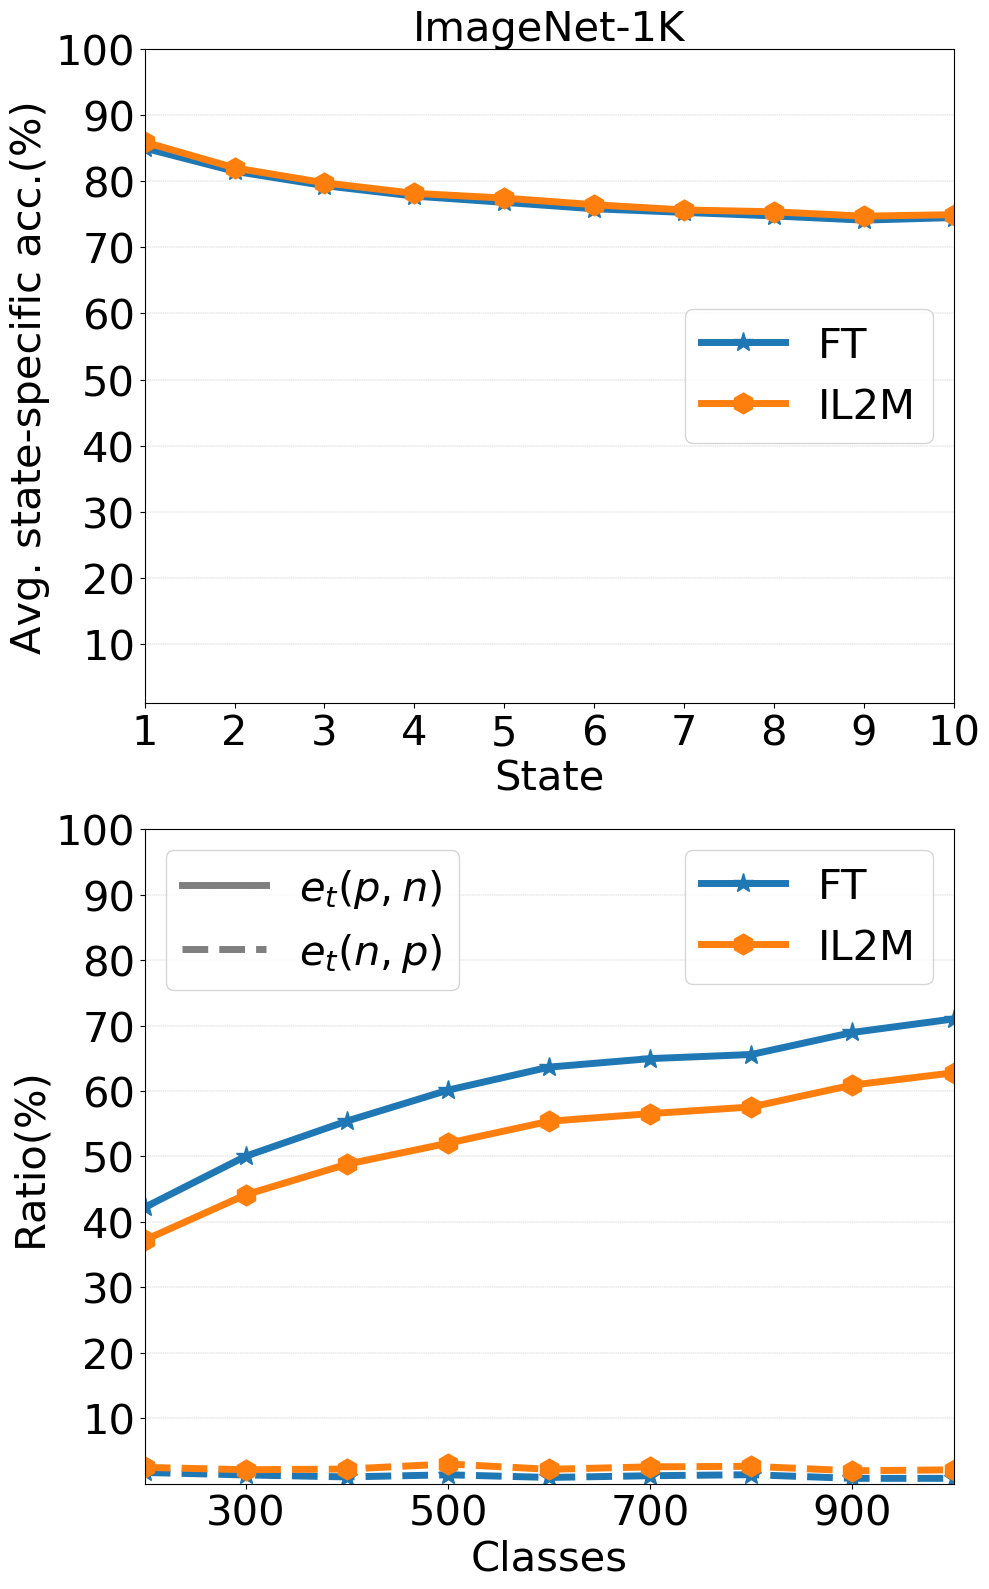

In [29]:
result_dict = {}
fig = plt.figure(figsize = (10,16))
title_arr = [r'$|\mathcal{M}|=10k$']

result_dict['coreset'] = sio.loadmat('RESULT_Imagenet_coreset_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat')
result_dict['IL2M'] = sio.loadmat('RESULT_Imagenet_IL2M_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat')

ax = fig.add_subplot(212)
for i, trainer in enumerate(['coreset','IL2M']):

    result = result_dict[trainer]
    class_array = [200,300,400,500,600,700,800,900,1000]

    stat = result['all'][0][0][2]
    stat_ratio = [0] * 9
    stat = result['all'][0][0][2]
    stat_ratio = [0] * 9
    old_ratio = [0] * 9
    new_ratio = [0] * 9
    for j in range(9):
        old_ratio[j] = stat[j][2] / (stat[j][0]+stat[j][1]+stat[j][2]) * 100
        new_ratio[j] = stat[j][5] / (stat[j][3]+stat[j][4]+stat[j][5]) * 100

    ax.plot(class_array, old_ratio, linestyle='-', label=name_dict[trainer], marker = line_markers[i], linewidth=linewidth, markersize=markersize, color = color_arr[i])
    ax.plot(class_array, new_ratio, linestyle='--', marker = line_markers[i], linewidth=linewidth, markersize=markersize, color = color_arr[i])

    if idx == 0:
        e_p_n, = ax.plot(class_array, np.zeros(9)-1, linestyle='-', linewidth=linewidth, color = '#7f7f7f')
        e_n_p, = ax.plot(class_array, np.zeros(9)-1, linestyle='--', linewidth=linewidth, color = '#7f7f7f')

plt.ylim(0,100)
plt.xlim(200,1000)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
plt.xticks([300,500,700,900],fontsize = 30)
plt.xticks(fontsize = 30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.xlabel('Classes', fontsize=30)

plt.ylabel('Ratio(%)', fontsize=30)
# leg1 = ax.legend(bbox_to_anchor=(0, 2.27, 1,.102), loc=3, ncol=4, mode='expand', borderaxespad=0., frameon = True, fontsize = 20)
leg1 = ax.legend(loc='upper right', fontsize=30)
leg2 = ax.legend([e_p_n, e_n_p], [r'$e_t(p,n)$', r'$e_t(n,p)$'], loc='upper left', fontsize=30)
ax.add_artist(leg1)

ax = fig.add_subplot(211)
for i, trainer in enumerate(['coreset','IL2M']):

    result = result_dict[trainer]
    class_array = [1,2,3,4,5,6,7,8,9,10]
    
    task_1 = result['task_soft_1']
    task_1_avg = [0] * 10

    for j in range(10):
        task_1_avg[j] = sum(task_1[j]) / (j+1)
    
    ax.plot(class_array, task_1_avg, linestyle='-', label=name_dict[trainer], marker = line_markers[i], linewidth=linewidth, markersize=markersize)

plt.ylim(1,100)
plt.xlim(1,10)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10],fontsize = 30)
plt.xticks(fontsize = 30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.xlabel('State', fontsize=30)
plt.title('ImageNet-1K', fontsize=30)
# plt.title('Average accuracy', fontsize=30)
plt.ylabel('Avg. state-specific acc.(%)', fontsize=30)
plt.legend(loc='center right', fontsize=30)

plt.tight_layout()

plt.savefig('figures/Bias_motivation.pdf', bbox_inches='tight')        

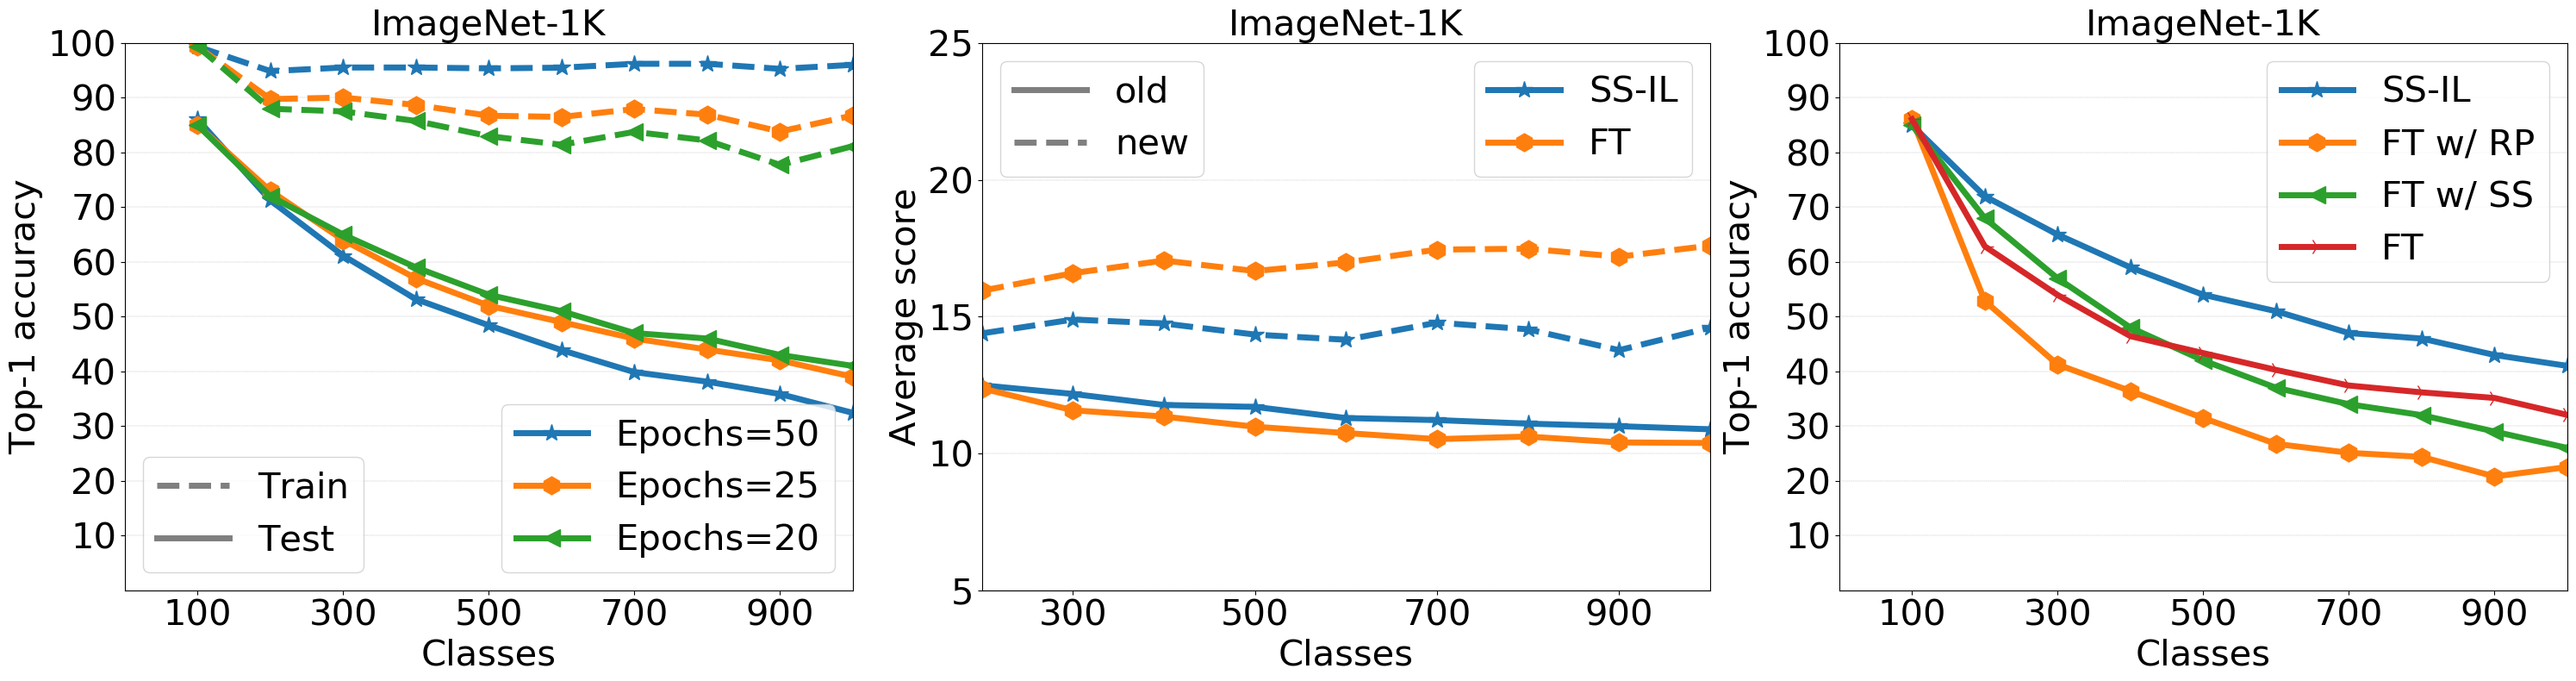

In [11]:
class_arr = [100,200,300,400,500,600,700,800,900,1000]
markersize=15
linewidth=5

result_2_tr = [99.36, 94.88, 95.54, 95.54, 95.38, 95.51, 96.22, 96.22, 95.29, 96.03]
result_2_prev = [00.0,92.70,93.54,91.97,93.11,94.01,93.44,94.34,95.14,92.96]
result_2_curr = [99.36,95.05,95.69,95.81,95.56,95.63,96.43,96.36,95.30,96.26]

result_4_tr = [99.38, 89.77, 90.04, 88.70, 86.73, 86.51, 87.95, 86.92, 83.84, 86.78]
result_4_prev = [00.0, 94.65, 95.59, 95.01, 96.47, 97.01, 97.24, 97.99, 98.23, 97.27]
result_4_curr = [99.38, 89.39, 89.61, 88.21, 85.97, 85.69, 87.26, 86.07, 82.76, 85.98]

result_5_tr = [99.39, 88.00, 87.52, 85.77, 82.99, 81.42, 83.78, 82.20, 77.74, 81.17]
result_5_prev = [94.49, 95.54, 95.70, 97.15, 97.81, 97.65, 98.52, 98.85, 98.24]
result_5_curr = [99.39, 87.49, 86.90, 84.99, 81.88, 80.14, 82.75, 80.94, 76.15, 79.85]

result_2 = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_2_RingBuffer_CE_lr_change.mat')
result_4 = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat')
result_5 = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
result_10 = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_10_RingBuffer_CE_lr_change.mat')


fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot(131)
color_arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax.plot(class_arr, result_2_tr, linestyle='--', marker = line_markers[0], linewidth=linewidth, markersize=markersize, color = '#1f77b4')
ax.plot(class_arr, result_4_tr, linestyle='--', marker = line_markers[1], linewidth=linewidth, markersize=markersize, color = '#ff7f0e')
ax.plot(class_arr, result_5_tr, linestyle='--', marker = line_markers[2], linewidth=linewidth, markersize=markersize, color = '#2ca02c')

ax.plot(class_arr, result_2['all'][0][0][0][0], linestyle='-', label='Epochs=50', marker = line_markers[0], linewidth=linewidth, markersize=markersize, color = '#1f77b4')
ax.plot(class_arr, result_4['all'][0][0][0][0], linestyle='-', label='Epochs=25', marker = line_markers[1], linewidth=linewidth, markersize=markersize, color = '#ff7f0e')
ax.plot(class_arr, result_5['all'][0][0][0][0], linestyle='-', label='Epochs=20', marker = line_markers[2], linewidth=linewidth, markersize=markersize, color = '#2ca02c')

train, = ax.plot(class_arr, np.zeros(10)-1, linestyle='--', linewidth=linewidth, color = '#7f7f7f')
test, = ax.plot(class_arr, np.zeros(10)-1, linestyle='-', linewidth=linewidth, color = '#7f7f7f')

plt.ylim(0,100)
plt.xlim(0,1000)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
plt.xticks([100,300,500,700,900],fontsize = 30)
plt.xticks(fontsize = 30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.xlabel('Classes', fontsize=30)
plt.ylabel('Top-1 accuracy',fontsize=30)
plt.title('ImageNet-1K', fontsize=30)

leg1 = ax.legend(loc='lower right', fontsize=30)
leg2 = ax.legend([train, test], ['Train', 'Test'], loc='lower left', fontsize=30)
ax.add_artist(leg1)

################################################################################################################################################################################################################################################################################################################################

SSIL = sio.loadmat('SS-IL_score_stat.mat')
FT = sio.loadmat('FT_score_stat.mat')
color_arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

ax = fig.add_subplot(132)
class_array = [200,300,400,500,600,700,800,900,1000]
ax.plot(class_array, SSIL['old'][0], linestyle='-', label='SS-IL', marker = line_markers[0], linewidth=linewidth, markersize=markersize, color = '#1f77b4')
ax.plot(class_array, SSIL['new'][0], linestyle='--', marker = line_markers[0], linewidth=linewidth, markersize=markersize, color = '#1f77b4')
ax.plot(class_array, FT['old'][0], linestyle='-', label='FT', marker = line_markers[1], linewidth=linewidth, markersize=markersize, color = '#ff7f0e')
ax.plot(class_array, FT['new'][0], linestyle='--', marker = line_markers[1], linewidth=linewidth, markersize=markersize, color = '#ff7f0e')

e_p_n, = ax.plot(class_array, np.zeros(9)-1, linestyle='-', linewidth=linewidth, color = '#7f7f7f')
e_n_p, = ax.plot(class_array, np.zeros(9)-1, linestyle='--', linewidth=linewidth, color = '#7f7f7f')

plt.ylim(5,25)
plt.xlim(200,1000)
plt.yticks([5,10,15,20,25],fontsize = 30)
plt.xticks([300,500,700,900],fontsize = 30)
plt.xticks(fontsize = 30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.xlabel('Classes', fontsize=30)
plt.title('ImageNet-1K', fontsize=30)
plt.ylabel('Average score', fontsize=30)
leg1 = ax.legend(loc='upper right', fontsize=30)
leg2 = ax.legend([e_p_n, e_n_p], ['old', 'new'], loc='upper left', fontsize=30)
ax.add_artist(leg1)

################################################################################################################################################################################################################################################################################################################################

Ours = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
naive = sio.loadmat('RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_naive_lr_change.mat')
FT = sio.loadmat('RESULT_Imagenet_coreset_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat')
FT_sep = sio.loadmat('RESULT_Imagenet_coreset_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_prev_new_lr_change.mat')

class_arr = [100,200,300,400,500,600,700,800,900,1000]
markersize=15
linewidth=5

ax = fig.add_subplot(133)
ax.plot(class_arr, Ours['all'][0][0][0][0], linestyle='-', label='SS-IL', marker = line_markers[0], linewidth=linewidth, markersize=markersize)
ax.plot(class_arr, naive['all'][0][0][0][0], linestyle='-', label='FT w/ RP', marker = line_markers[1], linewidth=linewidth, markersize=markersize)
ax.plot(class_arr, FT['all'][0][0][0][0], linestyle='-', label='FT w/ SS', marker = line_markers[2], linewidth=linewidth, markersize=markersize)
ax.plot(class_arr, FT_sep['all'][0][0][0][0], linestyle='-', label='FT', marker = line_markers[3], linewidth=linewidth, markersize=markersize)

plt.ylim(0,100)
plt.xlim(0,1000)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
plt.xticks([100,300,500,700,900],fontsize = 30)
plt.xticks(fontsize = 30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.xlabel('Classes', fontsize=30)
plt.ylabel('Top-1 accuracy',fontsize=30)
plt.title('ImageNet-1K', fontsize=30)

plt.legend(loc='upper right', fontsize=30)

plt.tight_layout()

plt.savefig('figures/Analysis.pdf', bbox_inches='tight')  

dict_keys(['__header__', '__version__', '__globals__', 'stat', 'pred_gt'])


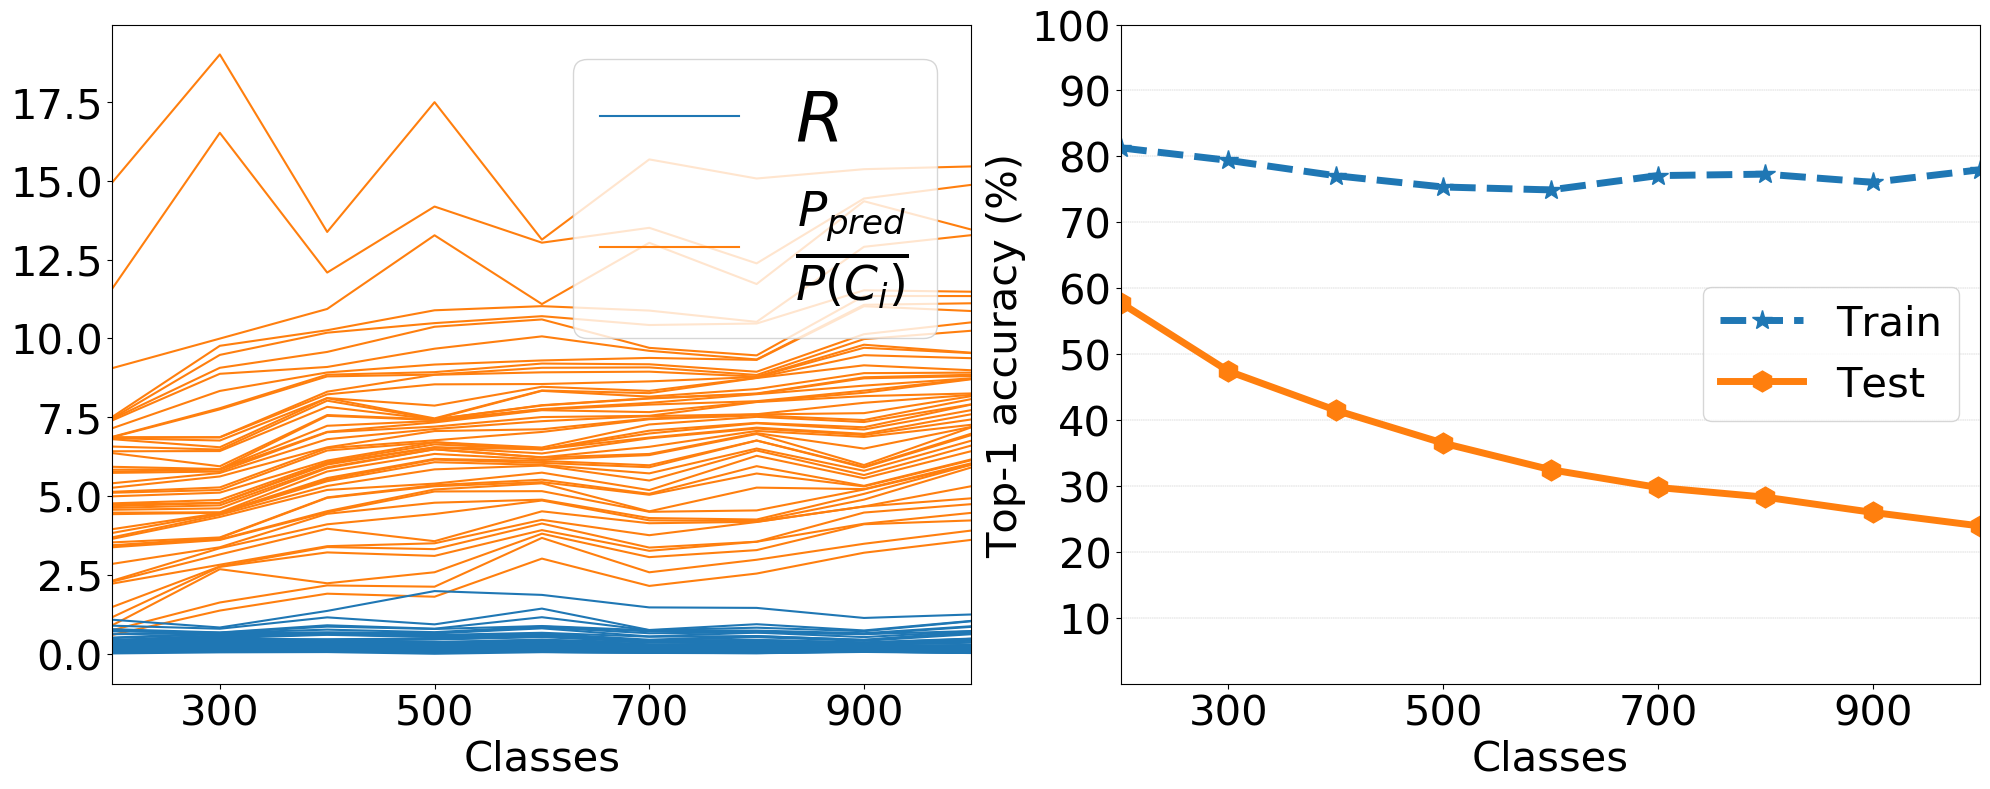

In [28]:
import seaborn as sns
class_array = [200,300,400,500,600,700,800,900,1000]
markersize=15
linewidth=5

result = sio.loadmat('FT_stat.mat')
print(result.keys())
strength = np.zeros((1000,9))
for t in range(10):
    start = 100 * t
    end = 100 * (t+1)
    strength[start:end,t:] = result['stat'][start:end,0].reshape((100,1)) / result['stat'][start:end,t+1:]


plot_num = 50
plot_idx = shuffle(np.arange(100), random_state=0)[:plot_num]

sampled_strength = np.sort(strength[:100][plot_idx], axis=0)
sampled_pred_gt = np.sort(result['pred_gt'][:100][plot_idx], axis=0)

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(121)

for i in range(plot_num):
    if i==0:
#         ax.plot(class_array, np.log(sampled_strength[i]), color = '#1f77b4', label = r'$R=\frac{\mu_P(C_i)}{\mu_N(C_i)} \cdot \frac{\mu(\mathcal{M}_N)}{\mu(\mathcal{M}_P)}$')
        ax.plot(class_array, np.log(sampled_strength[i]), color = '#1f77b4', label = r'$R$')
        ax.plot(class_array, np.log(sampled_pred_gt[i]), color = '#ff7f0e', label = r'$\frac{P_{pred}}{P(C_i)}$')
    else:
        ax.plot(class_array, np.log(sampled_strength[i]), color = '#1f77b4')
        ax.plot(class_array, np.log(sampled_pred_gt[i]), color = '#ff7f0e')

plt.xlabel('Classes', fontsize=30)
plt.xlim(200,1000)
plt.xticks([300,500,700,900], fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper right', fontsize=50)

ax = fig.add_subplot(122)
FT_tr_prev = [81.28, 79.39, 77.06, 75.35, 74.91, 77.08, 77.30, 76.06, 77.96]
FT_ts_prev = [57.74, 47.41, 41.48, 36.49, 32.47, 29.77, 28.30, 25.99, 23.93]

ax.plot(class_array, FT_tr_prev, linestyle='--', label='Train', marker = line_markers[0], linewidth=linewidth, markersize=markersize)
ax.plot(class_array, FT_ts_prev, linestyle='-', label='Test', marker = line_markers[1], linewidth=linewidth, markersize=markersize)

plt.xlabel('Classes', fontsize=30)
plt.xlim(200,1000)
plt.xticks([300,500,700,900], fontsize=30)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize = 30)
plt.ylabel('Top-1 accuracy (%)', fontsize=30)
plt.grid(linewidth=0.3, linestyle='--', axis='y')
plt.legend(loc='center right', fontsize=30)

plt.tight_layout()

plt.savefig('figures/IL2M.pdf', bbox_inches='tight')  

In [13]:
result = sio.loadmat('RESULT_Imagenet_IL2M_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_lr_change.mat')

stat = result['all'][0][0][2]

for i in range(9):
    print(stat[i][0] / (stat[i][0]+stat[i][1]+stat[i][2]) * 100)

57.74
47.410000000000004
41.486666666666665
36.49
32.476
29.770000000000003
28.305714285714284
25.995
23.935555555555553


In [17]:
for step in [50,100,200]:
    for replay in [16,32,64,128]:
    
        result = sio.loadmat('RESULT_Imagenet_er_0_memsz_5000_alpha_1_beta_0.0001_base_{}_replay_{}_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat'.format(step,replay))
        tasknum = len(result['all'][0][0][1][0])
        top_1 = result['all'][0][0][0][0]
        top_1_avg = sum(top_1) / tasknum
        stat = result['all'][0][0][2]
        stat_ratio = [0] * (tasknum-1)
        
        for i in range(tasknum-1):
            prev = stat[i][2] / (stat[i][0]+stat[i][1]+stat[i][2])
            new = stat[i][5] / (stat[i][3]+stat[i][4]+stat[i][5])
            stat_ratio[i] = (prev+new)/2 * 100
        
        avg_stat_ratio = sum(stat_ratio) / len(stat_ratio)
        
        print('replay: {}, step: {}, top_1_avg: {:.1f}, bias ratio {:.1f}'.format(replay,step,top_1_avg, avg_stat_ratio))

replay: 16, step: 50, top_1_avg: 50.2, bias ratio 21.7
replay: 32, step: 50, top_1_avg: 49.0, bias ratio 25.3
replay: 64, step: 50, top_1_avg: 47.7, bias ratio 29.1
replay: 128, step: 50, top_1_avg: 45.1, bias ratio 33.2
replay: 16, step: 100, top_1_avg: 51.5, bias ratio 21.7
replay: 32, step: 100, top_1_avg: 52.6, bias ratio 20.0
replay: 64, step: 100, top_1_avg: 52.9, bias ratio 20.3
replay: 128, step: 100, top_1_avg: 51.9, bias ratio 21.5
replay: 16, step: 200, top_1_avg: 50.7, bias ratio 32.3
replay: 32, step: 200, top_1_avg: 53.2, bias ratio 27.6
replay: 64, step: 200, top_1_avg: 55.3, bias ratio 25.1
replay: 128, step: 200, top_1_avg: 55.2, bias ratio 24.3


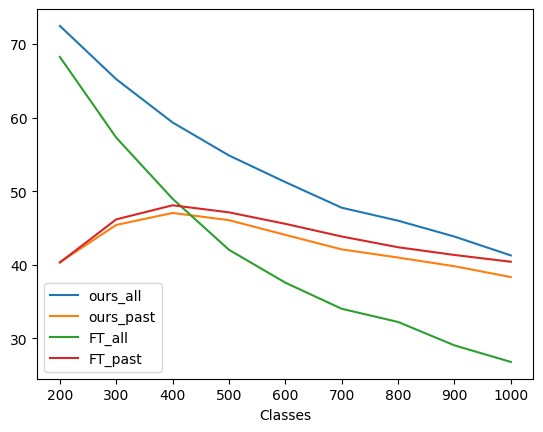

In [18]:
ours_all = [72.46,65.22,59.34,54.86,51.24,47.76,46.00,43.84,41.28]
ours_past = [40.36,45.42,47.05,46.07,44.07,42.10,40.99,39.81,38.34]
FT_all = [68.24,57.28,48.97,42.04,37.58,34.03,32.24,29.06,26.81]
FT_past = [40.32,46.18,48.09,47.13,45.57,43.85,42.39,41.34,40.42]

plt.plot((np.arange(1,10)+1)*100, ours_all, label='ours_all')
plt.plot((np.arange(1,10)+1)*100, ours_past, label='ours_past')
plt.plot((np.arange(1,10)+1)*100, FT_all, label='FT_all')
plt.plot((np.arange(1,10)+1)*100, FT_past, label='FT_past')

plt.xlabel('Classes')
plt.legend(loc='lower left')





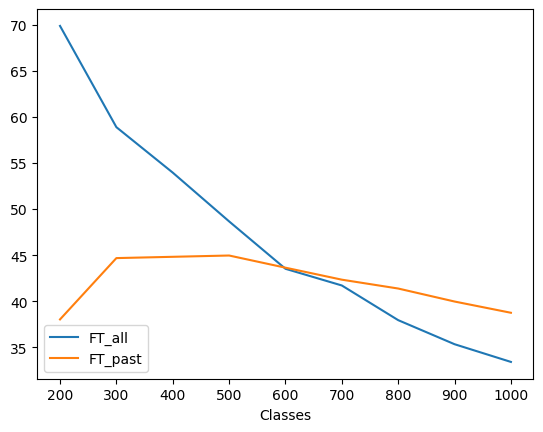

In [19]:
FT_all = [69.86,58.88,53.95,48.66,43.52,41.71,37.95,35.34,33.42]
FT_past = [38.03,44.68,44.82,44.96,43.64,42.34,41.38,39.97,38.75]

plt.plot((np.arange(1,10)+1)*100, FT_all, label='FT_all')
plt.plot((np.arange(1,10)+1)*100, FT_past, label='FT_past')

plt.xlabel('Classes')
plt.legend(loc='lower left')